In [2]:
import pandas as pd
csv = pd.read_csv("data/dataset.csv")
# csv.head()
# print(csv.describe())
# print(csv.info())
print(csv.shape)
print(csv.columns)
print(csv.isnull().sum())
csv.dtypes


(1000, 9)
Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')
Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

In [11]:
cat_cols = ['Weather','Traffic_Level','Time_of_Day']
for col in cat_cols :
    csv[col].fillna(csv[col].mode()[0],inplace=True)
csv["Courier_Experience_yrs"] = csv["Courier_Experience_yrs"].fillna(csv["Courier_Experience_yrs"].mean())

print(csv.isnull().sum())

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


In [ ]:
# csv.duplicated().any()

np.False_

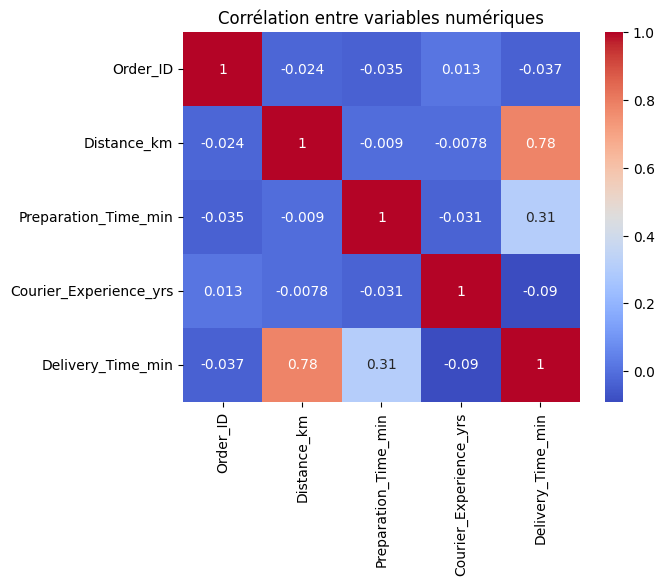

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#correlation
sns.heatmap(csv.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Corrélation entre variables numériques")
plt.show()

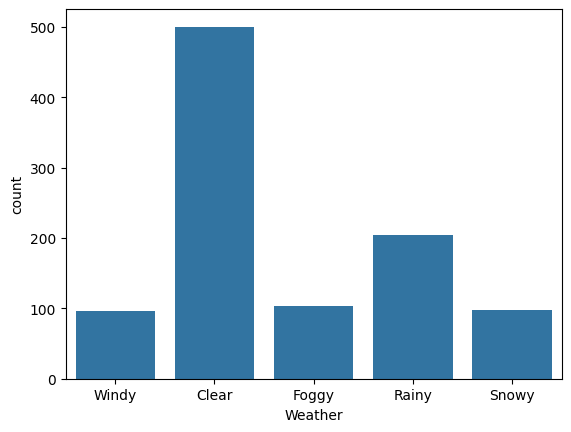

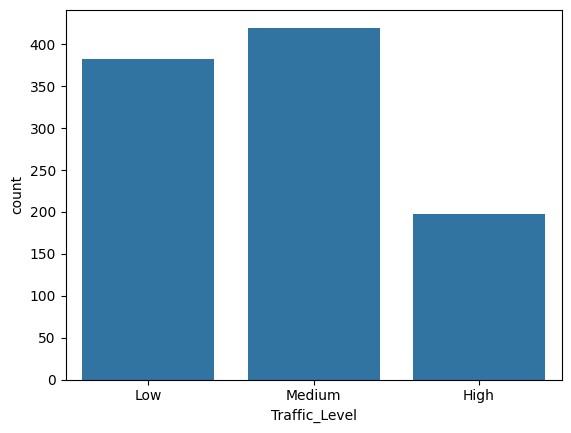

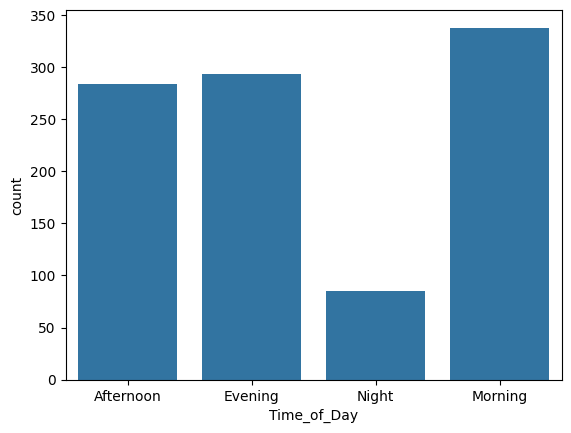

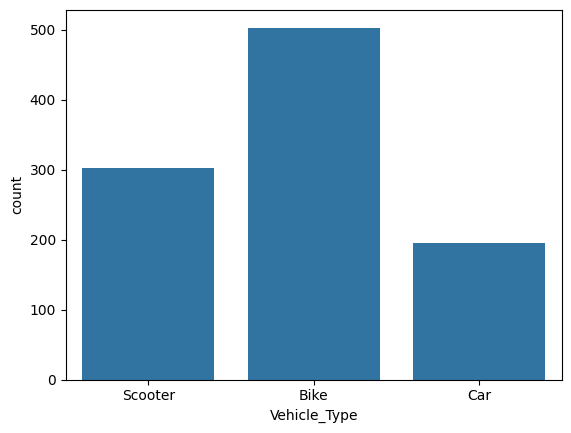

In [5]:
# plt.figure(figsize=(12,8))
# for col in cat_cols :
#     sns.countplot(data=csv,x=col,hue=col,palette='pastel')
#     plt.title(f'Distribution de {col}')
#     plt.xticks(rotation=45)
# # plt.tight_layout()
# plt.show()


cat_cols = csv.select_dtypes(include=['object']).columns
for col in cat_cols:
 if col != 'Order_ID':
   sns.countplot(data=csv,x=col)
   plt.show()
#    plt.figure(figsize=(12,4))
# print(csv['Delivery_Time_min'].value_counts(normalize=True))
# print(csv['Churn'].value_counts(normalize=True)) #le pourcentage de clients désabonnés vs fidèles.



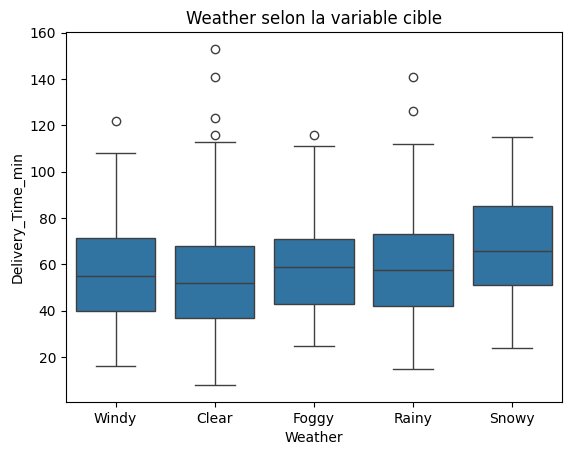

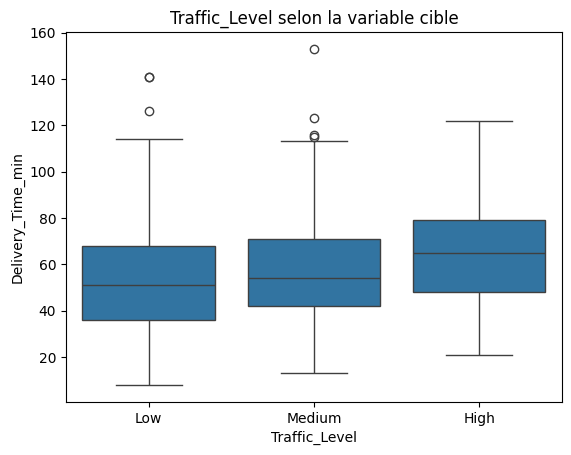

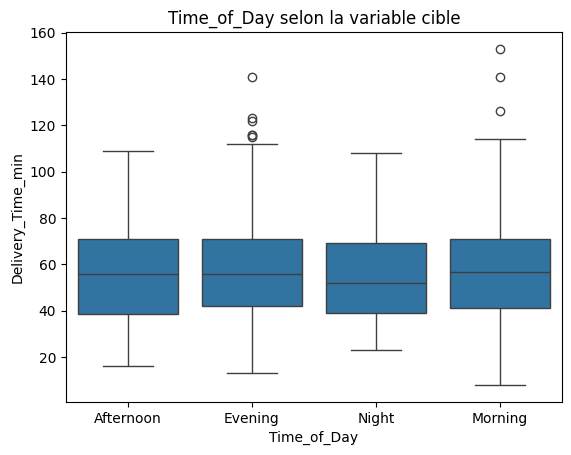

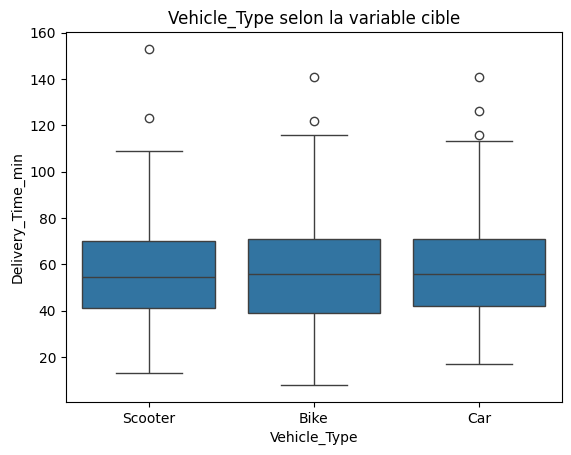

In [8]:
#DeliveryTime vs Traffic_Level
for col in cat_cols :
  if col != 'Order_ID':   
    sns.boxplot(x=col,y="Delivery_Time_min",data=csv)
    plt.title(f"{col} selon la variable cible")
    plt.show()